<div style="text-align: center;">
    <img src="https://media.licdn.com/dms/image/v2/D5612AQHAMDWC4URvnw/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1703585611284?e=1745452800&v=beta&t=bAUlHqwbzl0t_Wh93FvrG7FrWE08Uizh7NXtV12FqjY" alt="Numpy Logo" width="500">
    <p style="font-size: 50px; font-weight: bold;">Detecting Phishing Emails</p>
    <p style="font-size: 50px; font-weight: normal;"> Intern BCC 2025</p>
</div>

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score)
from urllib.parse import urlparse
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
import os
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
input_paths = []
for dirname, _, filenames in os.walk('..\data'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        input_paths.append(file_path)

..\data\CEAS_08.csv
..\data\Enron.csv
..\data\Ling.csv
..\data\Nazario.csv
..\data\Nigerian_Fraud.csv
..\data\phishing_email.csv
..\data\SpamAssasin.csv


In [3]:
dataframes = [pd.read_csv(path) for path in input_paths]
df = pd.concat(dataframes, axis=0, ignore_index=True)
df = df.dropna(subset=['body'])
df.reset_index(drop=True, inplace=True)

# Data Processing

proses pengumpulan data mentah dan mentransformasi data tersebut menjadi informasi

# Data Understanding

In [4]:
df.head()

,sender,receiver,date,subject,body,label,urls,text_combined
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN


In [5]:
# Basic EDA
print(df.head())
print(df.info())
print(df.isnull().sum())

                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          Never agree to be a loser   
1  

In [6]:
df.shape

(82485, 8)

In [7]:
df.dtypes

sender            object
receiver          object
date              object
subject           object
body              object
label              int64
urls             float64
text_combined     object
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

sender           32957
receiver         34718
date             33109
subject            347
body                 0
label                0
urls             32626
text_combined    82485
dtype: int64

In [10]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'text_combined'],
      dtype='object')

# Data Cleaning
- Menghapus karakter aneh
- Menghapus tanda baca dan HTML tags

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df1 = pd.read_csv('../data/CEAS_08.csv')
df1.head()
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

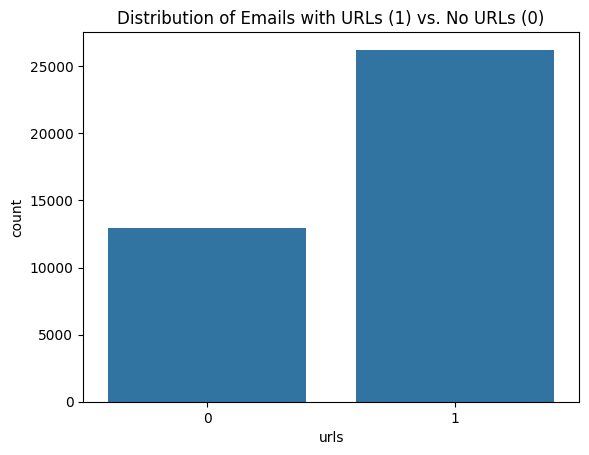

In [13]:
sns.countplot(x='urls', data=df1)
plt.title('Distribution of Emails with URLs (1) vs. No URLs (0)')
plt.show()

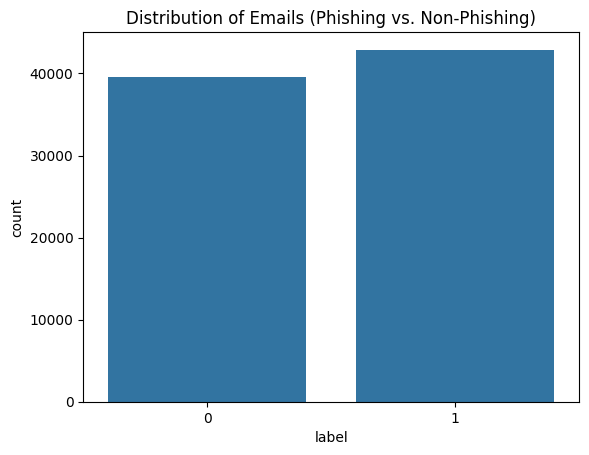

In [14]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Emails (Phishing vs. Non-Phishing)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26600\4245806133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette=['green', 'red'])


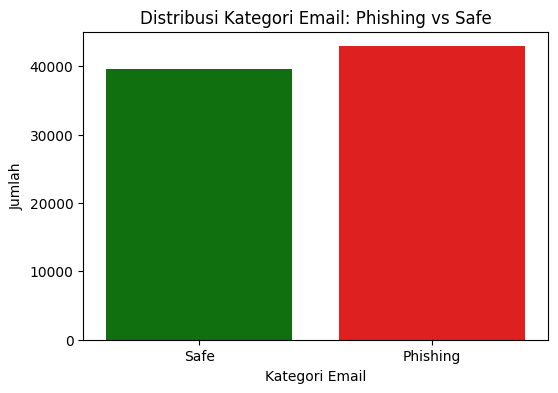

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette=['green', 'red'])
plt.xticks(ticks=[0,1], labels=['Safe', 'Phishing'])
plt.xlabel("Kategori Email")
plt.ylabel("Jumlah")
plt.title("Distribusi Kategori Email: Phishing vs Safe")
plt.show()

In [16]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'text_combined'],
      dtype='object')

C:\Users\User\AppData\Local\Temp\ipykernel_26600\419924191.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Kategori")  # Legenda otomatis berdasarkan label


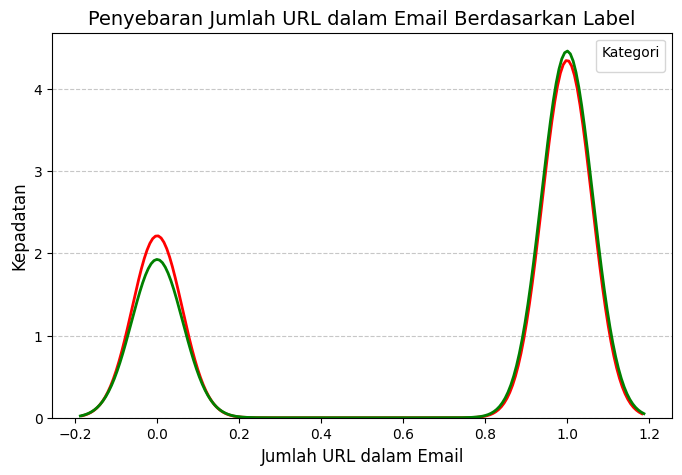

In [ ]:
plt.figure(figsize=(8,5))

# Menggunakan kdeplot untuk plot penyebaran tanpa histogram
sns.kdeplot(df, x='urls', hue='label', palette=['green', 'red'], fill=False, linewidth=2, common_norm=False)

plt.xlabel("Jumlah URL dalam Email", fontsize=12)
plt.ylabel("Kepadatan", fontsize=12)
plt.title("Penyebaran Jumlah URL dalam Email Berdasarkan Label", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid untuk mempermudah pembacaan
plt.legend(title="Kategori")  # Legenda otomatis berdasarkan label
plt.show()

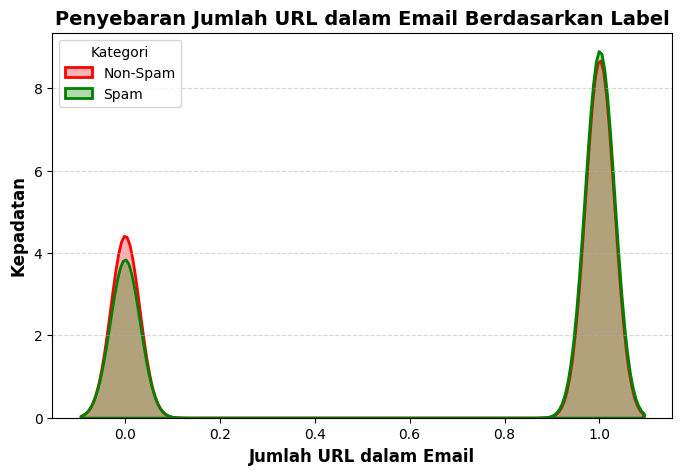

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Plot KDE untuk penyebaran jumlah URL dalam email berdasarkan label
sns.kdeplot(
    data=df, 
    x='urls', 
    hue='label', 
    palette={0: 'green', 1: 'red'}, 
    fill=True, 
    alpha=0.3, 
    linewidth=2, 
    bw_adjust=0.5,  # Menyesuaikan bandwidth agar lebih halus
    common_norm=False
)

# Menyesuaikan label dan judul
plt.xlabel("Jumlah URL dalam Email", fontsize=12, fontweight='bold')
plt.ylabel("Kepadatan", fontsize=12, fontweight='bold')
plt.title("Penyebaran Jumlah URL dalam Email Berdasarkan Label", fontsize=14, fontweight='bold')

# Menyesuaikan grid agar tidak terlalu dominan
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menyesuaikan legenda agar lebih deskriptif
plt.legend(title="Kategori", labels=["Non-Spam", "Spam"], fontsize=10)

# Menampilkan plot
plt.show()


In [18]:
from wordcloud import WordCloud

# Pisahkan teks dari email phishing dan safe
phishing_text = " ".join(df[df['label'] == 1]['cleaned_body'])
safe_text = " ".join(df[df['label'] == 0]['cleaned_body'])

# Word Cloud untuk phishing
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
wordcloud = WordCloud(width=500, height=500, background_color='white').generate(phishing_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud - Phishing Emails")

# Word Cloud untuk safe
plt.subplot(1,2,2)
wordcloud = WordCloud(width=500, height=500, background_color='white').generate(safe_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud - Safe Emails")

plt.show()


KeyError: 'cleaned_body'

In [ ]:
# Function to extract features from a URL
def extract_url_features(url):
    features = []
    
    # Feature 1: Check if URL starts with "https" (phishing links often don't use https)
    features.append(1 if url.lower().startswith("https") else 0)

    # Feature 2: Length of URL (phishing URLs tend to be longer)
    features.append(len(url))

    # Feature 3: Number of subdomains in the URL (phishing URLs often have multiple subdomains)
    parsed_url = urlparse(url)
    subdomain_count = len(parsed_url.netloc.split('.')) - 2  # Subdomains count, excluding domain and TLD
    features.append(subdomain_count)

    # Feature 4: Check if URL contains suspicious keywords like "login", "verify", etc.
    suspicious_keywords = ["login", "verify", "account", "secure", "update", "password"]
    features.append(1 if any(keyword in url.lower() for keyword in suspicious_keywords) else 0)

    # Feature 5: Number of URL parameters (phishing sites often have multiple parameters)
    features.append(url.count('?'))

    return features

# Function to process extracted URLs for each row and generate aggregated feature vectors
def extract_features_from_urls(urls):
    all_features = []
    
    # Iterate over each URL in the list of URLs
    for url in urls:
        features = extract_url_features(url)
        all_features.append(features)
    
    # If there are multiple URLs, aggregate the features (average the numeric ones)
    if all_features:
        aggregated_features = []
        for i in range(len(all_features[0])):  # Iterate over each feature
            if isinstance(all_features[0][i], (int, float)):  # Check if the feature is numeric
                aggregated_features.append(sum(f[i] for f in all_features) / len(all_features))
            else:
                # Handle non-numeric features (e.g., suspicious keywords)
                aggregated_features.append(None)  # Use None for non-numeric features
        return aggregated_features
    else:
        # Return default vector (zeros) if there are no URLs
        return [0] * 5  # 5 features as defined earlier

# Example usage with your existing dataframe
df['extracted_urls'] = df['extracted_urls'].apply(extract_features_from_urls)

# Print the updated dataframe to verify the changes
print(df[['sender', 'extracted_urls']].head())


KeyError: 'extracted_urls'

In [ ]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'text_combined'],
      dtype='object')

In [ ]:
phishing_corpus = []
for msg in df[df['label'] == 1]['text'].tolist():
    for word in msg.split():
        if word=="url":
            continue
        phishing_corpus.append(word)
len(phishing_corpus)
        

KeyError: 'text'

In [ ]:
# Assuming 'phishing_corpus' is a list or iterable containing the words
phishing_corpus_counter = Counter(phishing_corpus).most_common(30)

# Create a DataFrame from the Counter object
dff = pd.DataFrame(phishing_corpus_counter, columns=['Word', 'Frequency'])

# Plot the barplot
sns.barplot(x='Word', y='Frequency', data=dff)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

NameError: name 'Counter' is not defined

In [ ]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'text_combined'],
      dtype='object')

In [ ]:
df.head()

,sender,receiver,date,subject,body,label,urls,text_combined
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN


In [ ]:
df.loc[1:10, ["date"]]

,date
1,"Tue, 05 Aug 2008 18:31:03 -0500"
2,"Tue, 05 Aug 2008 20:28:00 -1200"
3,"Tue, 05 Aug 2008 17:31:20 -0600"
4,"Tue, 05 Aug 2008 19:31:21 -0400"
5,"Wed, 06 Aug 2008 05:31:22 +0600"
6,"Tue, 05 Aug 2008 21:44:01 +0000"
7,"Tue, 05 Aug 2008 20:41:14 -0300"
8,"Tue, 05 Aug 2008 15:31:03 -0800"
9,"Wed, 06 Aug 2008 00:31:38 +0100"
10,"Tue, 05 Aug 2008 21:44:06 +0000"


In [ ]:
df["date"] = pd.to_datetime(df["date"], errors="coerce", utc=True)

df["year"] = df["date"].dt.year

year_range = (df["year"].min(), df["year"].max())
year_range


(1980.0, 2100.0)

In [ ]:
df["date"].head(10)

0   2008-08-05 23:31:02+00:00
1   2008-08-05 23:31:03+00:00
2   2008-08-06 08:28:00+00:00
3   2008-08-05 23:31:20+00:00
4   2008-08-05 23:31:21+00:00
5   2008-08-05 23:31:22+00:00
6   2008-08-05 21:44:01+00:00
7   2008-08-05 23:41:14+00:00
8   2008-08-05 23:31:03+00:00
9   2008-08-05 23:31:38+00:00
Name: date, dtype: datetime64[ns, UTC]

In [ ]:
df.isna()

,sender,receiver,date,subject,body,label,urls,text_combined,year
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
82480,False,False,False,False,False,False,False,True,False
82481,False,False,False,False,False,False,False,True,False
82482,False,False,False,False,False,False,False,True,False
82483,False,False,False,False,False,False,False,True,False


In [ ]:
df.duplicated

<bound method DataFrame.duplicated of                                                   sender  \
0                       Young Esposito <Young@iworld.de>   
1                           Mok <ipline's1983@icable.ph>   
2      Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                     Michael Parker <ivqrnai@pobox.com>   
4      Gretchen Suggs <externalsep1@loanofficertool.com>   
...                                                  ...   
82480  Professional_Career_Development_Institute@Frug...   
82481                          "IQ - TBA" <tba@insiq.us>   
82482                               Mike <raye@yahoo.lv>   
82483                   "Mr. Clean" <cweqx@dialix.oz.au>   
82484  "wilsonkamela400@netscape.net" <wilsonkamela50...   

                                             receiver  \
0                         user4@gvc.ceas-challenge.cc   
1                       user2.2@gvc.ceas-challenge.cc   
2                       user2.9@gvc.ceas-challenge.cc   
3      SpamAs

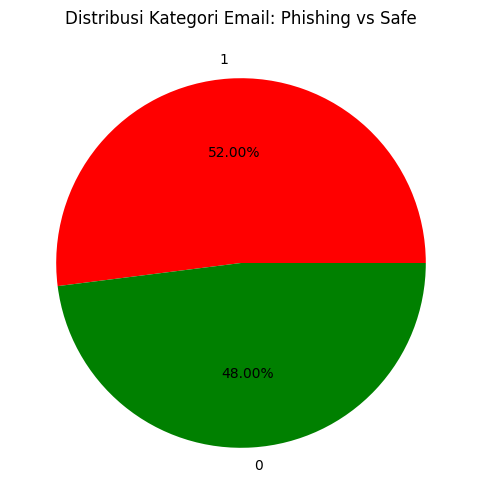

In [ ]:
label_counts = df['label'].value_counts()

# Membuat Pie Chart untuk distribusi kategori label
plt.figure(figsize=(6, 6))  # Menentukan ukuran pie chart
plt.pie(label_counts, labels=label_counts.index, autopct="%0.2f%%", colors=['red', 'green'])
plt.title("Distribusi Kategori Email: Phishing vs Safe")
plt.show()

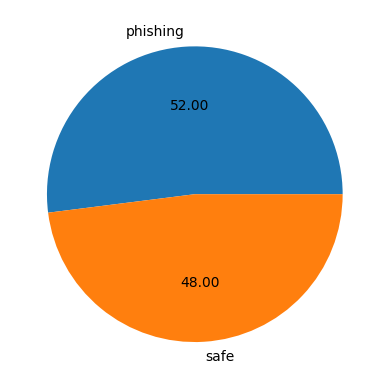

In [ ]:
df['label'].value_counts()
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['phishing','safe'],autopct="%0.2f")
plt.show()

In [ ]:
# Define a function to extract URLs from text
def extract_urls(text):
    # Regex pattern to match URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    
    # Find all URLs in the text
    urls = re.findall(url_pattern, text)
    
    # Replace URLs in the body with the text 'url'
    text_without_urls = re.sub(url_pattern, 'url', text)
    
    return text_without_urls, urls

# Apply the function to the 'body' column
df['body'], df['extracted_urls'] = zip(*df['body'].apply(extract_urls))

# Check the first few rows to verify the changes
df[['body', 'extracted_urls']].head()

,body,extracted_urls
0,"Buck up, your troubles caused by small dimensi...",[http://whitedone.com/]
1,\nUpgrade your sex and pleasures with these te...,[http://www.brightmade.com]
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,[http://www.cnn.com/video/partners/email/index...
3,Would anyone object to removing .so from this ...,[http://en.wikipedia.org/wiki/.so_%28domain_na...
4,\nWelcomeFastShippingCustomerSupport\nurl\n\n\n,[http://7iwfna.blu.livefilestore.com/y1pXdX3kw...


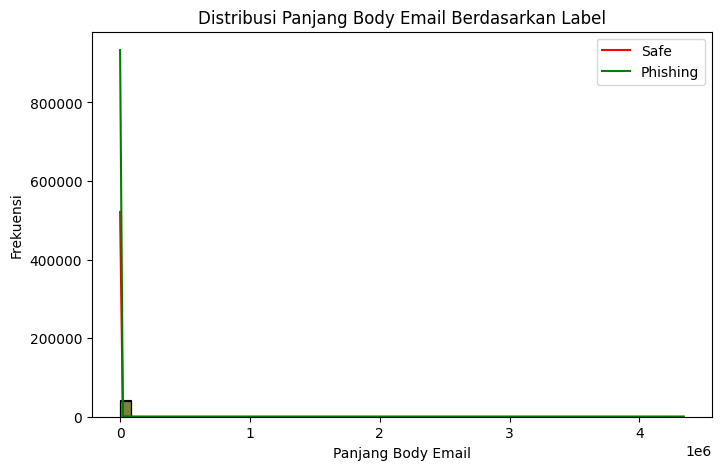

In [ ]:
# Ensure the body_length column exists
df['body_length'] = df['cleaned_body'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df, x='body_length', hue='label', bins=50, kde=True, palette=['green', 'red'])
plt.xlabel("Panjang Body Email")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Body Email Berdasarkan Label")
plt.legend(["Safe", "Phishing"])
plt.show()

In [ ]:
df['extracted_urls'].describe()

count     82485
unique    14513
top          []
freq      50405
Name: extracted_urls, dtype: object

In [ ]:
df.head()

,sender,receiver,date,subject,body,label,urls,text_combined,year,extracted_urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,2008-08-05 23:31:02+00:00,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN,2008.0,[http://whitedone.com/]
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,2008-08-05 23:31:03+00:00,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN,2008.0,[http://www.brightmade.com]
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,2008-08-06 08:28:00+00:00,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN,2008.0,[http://www.cnn.com/video/partners/email/index...
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,2008-08-05 23:31:20+00:00,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN,2008.0,[http://en.wikipedia.org/wiki/.so_%28domain_na...
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,2008-08-05 23:31:21+00:00,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nurl\n\n\n,1,1.0,NaN,2008.0,[http://7iwfna.blu.livefilestore.com/y1pXdX3kw...


In [ ]:
df1.isna().sum()

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

In [ ]:
df1.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')

In [ ]:
df1["urls"]

0        1
1        1
2        1
3        1
4        1
        ..
39149    0
39150    0
39151    0
39152    0
39153    1
Name: urls, Length: 39154, dtype: int64

In [ ]:
df1["urls"].sum()

26232

In [ ]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'text_combined', 'year', 'extracted_urls'],
      dtype='object')

In [ ]:
df['extracted_urls'].head(20)

0                               [http://whitedone.com/]
1                           [http://www.brightmade.com]
2     [http://www.cnn.com/video/partners/email/index...
3     [http://en.wikipedia.org/wiki/.so_%28domain_na...
4     [http://7iwfna.blu.livefilestore.com/y1pXdX3kw...
5                                                    []
6                                                    []
7     [http://www.cnn.com/video/partners/email/index...
8     [http://issues.apache.org/SpamAssassin/show_bu...
9     [http://www.cnn.com/video/partners/email/index...
10                         [http://freshplateworks.com]
11                             [http://oemmerchant.com]
12    [http://www.cnn.com/video/partners/email/index...
13    [http://www.cnn.com/video/partners/email/index...
14                                [http://pacelike.com]
15    [http://ieinternet.com/mailwall/), http://iein...
16    [http://www.cnn.com/video/partners/email/index...
17    [http://www.cnn.com/video/partners/email/i

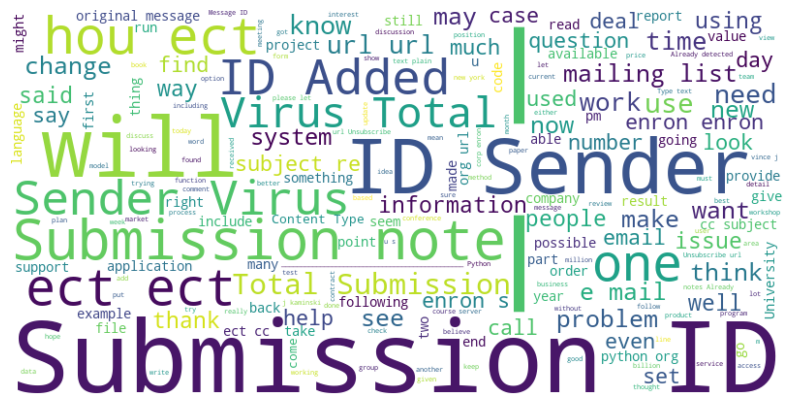

In [ ]:
safe_email = df[df["label"] == 0]
safe_text = " ".join(safe_email["body"])
word_cloud = WordCloud(width=800,height=400,background_color="white").generate(safe_text)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def clean_email_content_with_links(email_body):
    # Preserve URLs: Using regex to replace URLs with a placeholder
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_body)
    for i, url in enumerate(urls):
        email_body = email_body.replace(url, f"*URL_{i}*")  # Replace URL with a unique placeholder


    # Remove any non-alphanumeric characters except spaces, and URLs are already preserved
    email_body = re.sub(r'[^a-zA-Z0-9\s*URL_\d*]', '', email_body)

    # Normalize whitespace (remove extra spaces and tabs)
    email_body = re.sub(r'\s+', ' ', email_body).strip()

    return email_body, urls  # Return both the cleaned body and the list of URLs

# Applying the updated cleaning function to the email body column
df['cleaned_body'], df['extracted_urls'] = zip(*df['body'].apply(clean_email_content_with_links))

# Display the first few rows to verify
print(df[['body', 'cleaned_body', 'extracted_urls','label']][918:])
df['extracted_urls'][1972:]

                                                    body  \
918    Selon Sébastien Aperghis-Tramoni :\n\n> Leon B...   
919       Enlarged man pole to reach womens G-spots url   
920    Basil Chupin wrote:\n>\n> The need to create a...   
921    Hi everyone\n\nI sent this through the other d...   
922    Hello, Leon.\n\n2007/10/2, Leon Brocard :\n> P...   
...                                                  ...   
82480  \n\n  \n---  \n![](url  \n| ![](url |  |\n\n**...   
82481  This is a multi-part message in MIME format. -...   
82482  Dear Subscriber,\n\nIf I could show you a way ...   
82483  ****Mid-Summer Customer Appreciation SALE!****...   
82484  ATTN:SIR/MADAN      \n\n                      ...   

                                            cleaned_body extracted_urls  label  
918    Selon Sbastien AperghisTramoni Leon Brocard wr...             []      0  
919         Enlarged man pole to reach womens Gspots url             []      1  
920    Basil Chupin wrote The need t

1972     []
1973     []
1974     []
1975     []
1976     []
         ..
82480    []
82481    []
82482    []
82483    []
82484    []
Name: extracted_urls, Length: 80513, dtype: object

## EDA

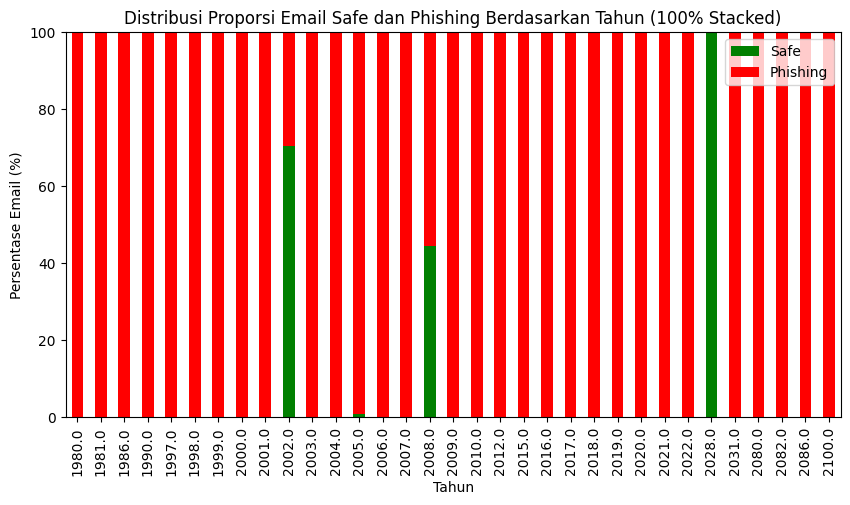

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah email per tahun berdasarkan label
email_per_year = df.groupby(['year', 'label']).size().unstack()

# Normalisasi ke dalam bentuk proporsi (%) per tahun
email_per_year_norm = email_per_year.div(email_per_year.sum(axis=1), axis=0) * 100

# Plot stacked bar chart (100% distribution)
email_per_year_norm.plot(kind='bar', figsize=(10, 5), stacked=True, color=['green', 'red'])

plt.xlabel("Tahun")
plt.ylabel("Persentase Email (%)")
plt.title("Distribusi Proporsi Email Safe dan Phishing Berdasarkan Tahun (100% Stacked)")
plt.legend(["Safe", "Phishing"])
plt.ylim(0, 100)  # Pastikan skala 100%
plt.show()


## Text Cleaning Function

In [ ]:
def clean_email_content_with_links(email_body):
    # Preserve URLs by replacing them with placeholders
    urls = re.findall(r'http[s]?://(?:[a-zA-Z0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_body)
    for i, url in enumerate(urls):
        email_body = email_body.replace(url, f"*URL_{i}*")
    # Remove non-alphanumeric characters (except spaces and the URL placeholder pattern)
    email_body = re.sub(r'[^a-zA-Z0-9\s*URL_\d*]', '', email_body)
    # Normalize whitespace
    email_body = re.sub(r'\s+', ' ', email_body).strip()
    return email_body, urls

In [ ]:
df['cleaned_body'], df['extracted_urls'] = zip(*df['body'].apply(clean_email_content_with_links))
print(df[['body', 'cleaned_body', 'extracted_urls','label']].head(5))

                                                body  \
0  Buck up, your troubles caused by small dimensi...   
1  \nUpgrade your sex and pleasures with these te...   
2  >+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...   
3  Would anyone object to removing .so from this ...   
4    \nWelcomeFastShippingCustomerSupport\nurl\n\n\n   

                                        cleaned_body extracted_urls  label  
0  Buck up your troubles caused by small dimensio...             []      1  
1  Upgrade your sex and pleasures with these tech...             []      1  
2  THE DAILY TOP 10 from CNNcom Top videos and st...             []      1  
3  Would anyone object to removing so from this l...             []      0  
4             WelcomeFastShippingCustomerSupport url             []      1  


## Feature Engineering

In [ ]:
# 1. Tokenization and Vectorization: TF-IDF Vectorization for the cleaned email bodies
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # You can adjust max_features as needed
X_text = vectorizer.fit_transform(df['cleaned_body']).toarray()

# 2. Feature Engineering

# Feature 1: URLs - Number of URLs present in the email
df['num_urls'] = df['extracted_urls'].apply(len)

# Feature 2: Email Metadata - Extract domain from sender's email address
df['sender'] = df['sender'].fillna('unknown@unknown.com')
df['sender_domain'] = df['sender'].apply(lambda x: x.split('@')[-1] if '@' in x else 'unknown')

# Feature 3: Length Features
df['body_length'] = df['cleaned_body'].apply(len)

# 3. Convert categorical email sender domain into numerical representation
df['sender_domain'] = pd.factorize(df['sender_domain'])[0]

In [ ]:
# Text Features for LightGBM: TF-IDF on cleaned body
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text = tfidf_vectorizer.fit_transform(df['cleaned_body'])
X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
# For Naive Bayes: Use CountVectorizer (word count based)
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_text_nb = count_vectorizer.fit_transform(df['cleaned_body'])
X_text_nb_df = pd.DataFrame(X_text_nb.toarray(), columns=count_vectorizer.get_feature_names_out())

In [ ]:
# Additional Numeric Features:
df['num_urls'] = df['extracted_urls'].apply(len)
df['body_length'] = df['cleaned_body'].apply(len)
df['sender_domain'] = df['sender'].apply(lambda x: x.split('@')[-1] if '@' in x else 'unknown')
df['sender_domain'] = pd.factorize(df['sender_domain'])[0]

In [ ]:
# URL Feature Extraction Functions
def get_domain_from_url(url):
    try:
        return urlparse(url).netloc
    except:
        return ''

In [ ]:
def count_special_chars(url):
    return len(re.findall(r'[@%&\*\$#\?\+\!]', url))

In [ ]:
def is_url_shortened(url):
    shortened_domains = ['bit.ly', 'tinyurl.com', 'goo.gl']
    domain = get_domain_from_url(url)
    return 1 if any(shortened in domain for shortened in shortened_domains) else 0

In [ ]:
def extract_url_features(row):
    urls = row['extracted_urls']
    avg_url_length = sum(len(url) for url in urls) / len(urls) if urls else 0
    num_special_chars = sum(count_special_chars(url) for url in urls)
    has_url_short = sum(is_url_shortened(url) for url in urls)
    num_query_params = sum(url.count('?') for url in urls)
    has_https = sum(1 for url in urls if 'https://' in url)
    suspicious_keywords = ['login', 'bank', 'security', 'account', 'verify']
    num_suspicious_keywords = sum(any(keyword in url for keyword in suspicious_keywords) for url in urls)
    return [avg_url_length, num_special_chars, has_url_short, num_query_params, has_https, num_suspicious_keywords]

url_features = df.apply(lambda row: extract_url_features(row), axis=1)
url_features_df = pd.DataFrame(url_features.tolist(), columns=[
    'avg_url_length', 'num_special_chars',
    'has_url_shortener', 'num_query_params',
    'has_https', 'num_suspicious_keywords_in_urls'
])

In [ ]:
# Combine features for LightGBM model
X_lgb = pd.concat([X_text_df, df[['num_urls', 'sender_domain', 'body_length']], url_features_df], axis=1)

In [ ]:
# 5a. LightGBM Classifier
from lightgbm import LGBMClassifier

# Assuming 'label' is the target variable
X = X_lgb
y = df['label']

# Split the data into training and testing sets
X_train_lgb, X_test_lgb, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = LGBMClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
lgb_model.fit(X_train_lgb, y_train)
y_pred_lgb = lgb_model.predict(X_test_lgb)
y_pred_proba_lgb = lgb_model.predict_proba(X_test_lgb)[:, 1]

print("LightGBM Performance:")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lgb))

[LightGBM] [Info] Number of positive: 34291, number of negative: 31697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.209165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 740124
[LightGBM] [Info] Number of data points in the train set: 65988, number of used features: 4983
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.519655 -> initscore=0.078661
[LightGBM] [Info] Start training from score 0.078661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [22]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'text_combined'],
      dtype='object')

In [23]:
df.head()

,sender,receiver,date,subject,body,label,urls,text_combined
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN


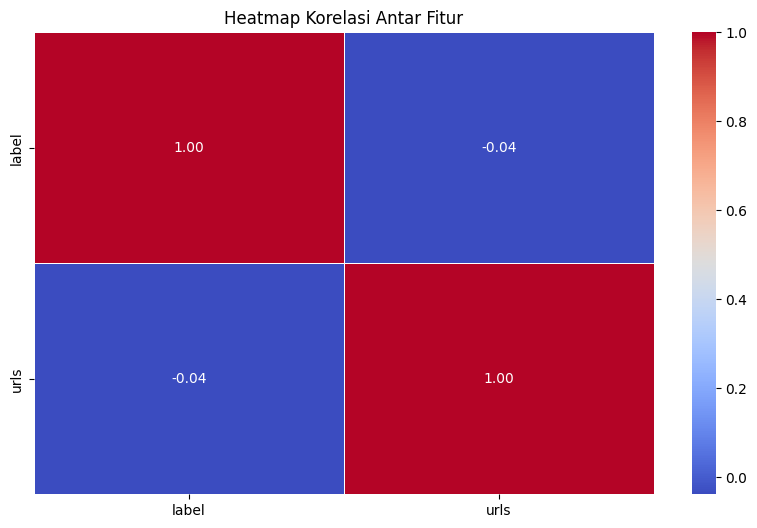

In [24]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Menghitung korelasi antar fitur numerik
correlation_matrix = numeric_df.corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [28]:
df['urls' = 1.0]

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1483136211.py, line 1)

In [26]:
df.head()

,sender,receiver,date,subject,body,label,urls,text_combined
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN
